In [1]:
# Basic modules
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Data Visualization
from matplotlib import pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("C:/Users/user/Desktop/adult.csv",encoding = "utf-8")
df.head()

,age,fnlwgt,Education number,marital status,relation,Race,gender,Capital gains,Capital loss,everyweek hours,Every_aver_hr,country,sarly
0,39,77516,13,Never-married,Not-in-family,White,Male,2174,0,40,1,United-States,0
1,50,83311,13,Married-civ-spouse,Husband,White,Male,0,0,13,0,United-States,0
2,38,215646,9,Divorced,Not-in-family,White,Male,0,0,40,1,United-States,0
3,53,234721,7,Married-civ-spouse,Husband,Black,Male,0,0,40,1,United-States,0
4,28,338409,13,Married-civ-spouse,Wife,Black,Female,0,0,40,1,Cuba,0


In [3]:
df.describe()

,age,fnlwgt,Education number,Capital gains,Capital loss,everyweek hours,Every_aver_hr,sarly
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.178711,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.383116,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000,1.000000


In [4]:
print(df.count()==len(df))
#是否有缺失值

age                 True
fnlwgt              True
Education number    True
marital status      True
relation            True
Race                True
gender              True
Capital gains       True
Capital loss        True
everyweek hours     True
Every_aver_hr       True
country             True
sarly               True
dtype: bool


In [5]:
df_pre = df

In [6]:
df_duplicate = df_pre[df_pre.duplicated(keep="last")]
#有重複值的保留最後一項

In [7]:
print(df_duplicate)

       age  fnlwgt  Education number       marital status        relation  \
531     26  108658                 9        Never-married   Not-in-family   
706     40  229148                 8   Married-civ-spouse         Husband   
1194    19  187161                10        Never-married       Own-child   
2303    90   52386                10        Never-married   Not-in-family   
2896    46  271828                 9   Married-civ-spouse         Husband   
...    ...     ...               ...                  ...             ...   
22725   23  216811                 9        Never-married       Own-child   
23851   25  367306                10        Never-married       Own-child   
24582   30   85708                 9   Married-civ-spouse         Husband   
25624   39   30916                 9   Married-civ-spouse         Husband   
27412   18  170544                 7        Never-married       Own-child   

                      Race   gender  Capital gains  Capital loss  \
531    

In [8]:
print(df_duplicate.shape)
#查看矩陣或者數組的維數

(66, 13)


In [9]:
df_pre = df_pre.drop_duplicates()
#去掉重複項

In [10]:
print("Before data-preprocessing: ", df.shape)
print("After data-preprocessing: ", df_pre.shape)
#資料處理前後差別

Before data-preprocessing:  (32561, 13)
After data-preprocessing:  (32495, 13)


In [11]:
df_labelencoder = df_pre
df_onehotencoder = df_pre
df_pre.head()

,age,fnlwgt,Education number,marital status,relation,Race,gender,Capital gains,Capital loss,everyweek hours,Every_aver_hr,country,sarly
0,39,77516,13,Never-married,Not-in-family,White,Male,2174,0,40,1,United-States,0
1,50,83311,13,Married-civ-spouse,Husband,White,Male,0,0,13,0,United-States,0
2,38,215646,9,Divorced,Not-in-family,White,Male,0,0,40,1,United-States,0
3,53,234721,7,Married-civ-spouse,Husband,Black,Male,0,0,40,1,United-States,0
4,28,338409,13,Married-civ-spouse,Wife,Black,Female,0,0,40,1,Cuba,0


In [12]:
col_num = ["age", "Working class", "Education number","everyweek hours","sarly"]
#需要的欄位值

In [13]:
col_cat = df_pre.columns.difference(col_num) 
col_cat

Index(['Capital gains', 'Capital loss', 'Every_aver_hr', 'Race', 'country',
       'fnlwgt', 'gender', 'marital status', 'relation'],
      dtype='object')

In [14]:
list(enumerate(col_num))

[(0, 'age'),
 (1, 'Working class'),
 (2, 'Education number'),
 (3, 'everyweek hours'),
 (4, 'sarly')]

In [15]:
# Import LabelEncoder to convert categoricla data
from sklearn.preprocessing import LabelEncoder

# Use LabelEncoder to convert categorical variables to numerical ones
df_labelencoder[col_cat] = df_labelencoder[col_cat].apply(LabelEncoder().fit_transform)
df_labelencoder.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,fnlwgt,Education number,marital status,relation,Race,gender,Capital gains,Capital loss,everyweek hours,Every_aver_hr,country,sarly
0,39,2671,13,4,1,4,1,25,0,40,1,39,0
1,50,2926,13,2,0,4,1,0,0,13,0,39,0
2,38,14086,9,0,1,4,1,0,0,40,1,39,0
3,53,15336,7,2,0,2,1,0,0,40,1,39,0
4,28,19355,13,2,5,2,0,0,0,40,1,5,0


In [16]:
print(df_pre['sarly'].unique())
#查看[]裡面的獨特值，EX:[1 2 3 4]等

[0 1]


In [19]:
# Import OneHotEncoder to convert categorical data
from sklearn.preprocessing import OneHotEncoder

# Initialize a OneHotEncoder
ohe = OneHotEncoder(categories="auto")

# Convert "education" to sparse array
sarr_edu = ohe.fit_transform(df_pre[["gender"]]).toarray()



# One hot features
edu_features = pd.DataFrame(sarr_edu)


edu_features.head()

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0


In [20]:
# Import OneHotEncoder to convert categorical data
from sklearn.preprocessing import OneHotEncoder

# Initialize a OneHotEncoder
ohe = OneHotEncoder(categories="auto")

# Convert "education" to sparse array
sarr_edu0 = ohe.fit_transform(df_pre[["Every_aver_hr"]]).toarray()



# One hot features
edu_features0 = pd.DataFrame(sarr_edu0)


edu_features0.head()

,0,1
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [21]:
df_pre

,age,fnlwgt,Education number,marital status,relation,Race,gender,Capital gains,Capital loss,everyweek hours,Every_aver_hr,country,sarly
0,39,2671,13,4,1,4,1,25,0,40,1,39,0
1,50,2926,13,2,0,4,1,0,0,13,0,39,0
2,38,14086,9,0,1,4,1,0,0,40,1,39,0
3,53,15336,7,2,0,2,1,0,0,40,1,39,0
4,28,19355,13,2,5,2,0,0,0,40,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,16528,12,2,5,4,0,0,0,38,0,39,0
32557,40,8080,9,2,0,4,1,0,0,40,0,39,1
32558,58,7883,9,6,4,4,0,0,0,40,0,39,0
32559,22,12881,9,4,3,4,1,0,0,20,0,39,0


In [22]:
X = df_pre.loc[:, df_pre.columns != "sarly"]

# This is target variable
#最後需要預估出的值
y = df_pre["sarly"]

In [23]:
print(X)

       age  fnlwgt  Education number  marital status  relation  Race  gender  \
0       39    2671                13               4         1     4       1   
1       50    2926                13               2         0     4       1   
2       38   14086                 9               0         1     4       1   
3       53   15336                 7               2         0     2       1   
4       28   19355                13               2         5     2       0   
...    ...     ...               ...             ...       ...   ...     ...   
32556   27   16528                12               2         5     4       0   
32557   40    8080                 9               2         0     4       1   
32558   58    7883                 9               6         4     4       0   
32559   22   12881                 9               4         3     4       1   
32560   52   17825                 9               2         5     4       0   

       Capital gains  Capital loss  eve

In [24]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: sarly, Length: 32495, dtype: int64


In [25]:
# Import the package from sklearn for spliting dataset
from sklearn.model_selection import train_test_split

# You may split the dataset into any portion you want
# "test_size" is the "portion parameter" you can use
# Now, we just split them into 70%(traning) 30%(testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Check the result
len(X_train), len(X_test), len(y_train), len(y_test)

(22746, 9749, 22746, 9749)

In [26]:
# Import model evaluation packages
# We will provide 4 commonly used model evaluation methods
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# First, let's program a function that will help us simplify the traning process.
# We just need to pass traning dataset and pre-initiated machine learning model to the function, and it wll do the rest.

def evaluate(dtc, X_train, y_train):
    # With this line, your ML model will fit the traning dataset automatically.
    # However, it's much better to understand the theory behind it before using any ML model.
    dtc.fit(X_train, y_train)

    # Print the algorithm you use and the traning result.
    # We compare the result from the model to traning dataset.
    print(f"Algorithm: {dtc}" + "\n")
    print(f"Accuracy is: {round(dtc.score(X_test, y_test), 2)}")
    #####################################################################
    # This line will help you get prediction value of target variable.
    
    y_pred = dtc.predict(X_test)
 
 #
    # Use the model evaluation tools from Sklearn
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    precision = round(precision_score(y_test, y_pred), 2)
    recall = round(recall_score(y_test, y_pred), 2)
    f1 = round(f1_score(y_test, y_pred), 2)
    
    # Print out the result
    print(f"Precision is: {precision}")
    print(f"Recall is: {recall}")
    print(f"f1 is: {f1}")

    # Pass the reslut
    return np.array([accuracy, precision, recall, f1])

In [27]:
# Import model evaluation packages
# We will provide 4 commonly used model evaluation methods
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# First, let's program a function that will help us simplify the traning process.
# We just need to pass traning dataset and pre-initiated machine learning model to the function, and it wll do the rest.

def evaluate(dtc, X_test, y_test):
    # With this line, your ML model will fit the traning dataset automatically.
    # However, it's much better to understand the theory behind it before using any ML model.
    dtc.fit(X_test, y_test)

    # Print the algorithm you use and the traning result.
    # We compare the result from the model to traning dataset.
    print(f"Algorithm: {dtc}" + "\n")
    print(f"Accuracy is: {round(dtc.score(X_train, y_train), 2)}")
    #####################################################################
    # This line will help you get prediction value of target variable.
    
    y_pred = dtc.predict(X_train)
 
 #
    # Use the model evaluation tools from Sklearn
    accuracy = round(accuracy_score(y_train, y_pred), 2)
    precision = round(precision_score(y_train, y_pred), 2)
    recall = round(recall_score(y_train, y_pred), 2)
    f1 = round(f1_score(y_train, y_pred), 2)
    
    # Print out the result
    print(f"Precision is: {precision}")
    print(f"Recall is: {recall}")
    print(f"f1 is: {f1}")

    # Pass the reslut
    return np.array([accuracy, precision, recall, f1])

In [28]:
arr_eval = np.array([])

In [29]:
# Import Decision tree from Sklearn
from sklearn.tree import DecisionTreeClassifier

# Initiate DecisionTreeClassifier() object
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=5,splitter='random')
#可以修改樹深參數、節點數及其他設定

# Start the function and store the result to "arr_eval"
# arr_eval = np.append(arr_eval, evaluate(dtc, X_train, y_train), axis=0)
# arr_eval

In [30]:
arr_eval = np.append(arr_eval, evaluate(dtc, X_train, y_train), axis=0)

Algorithm: DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, splitter='random')

Accuracy is: 0.8
Precision is: 0.84
Recall is: 0.21
f1 is: 0.33


In [31]:
arr_eval = np.append(arr_eval, evaluate(dtc, X_test, y_test), axis=0)

Algorithm: DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, splitter='random')

Accuracy is: 0.81
Precision is: 0.6
Recall is: 0.59
f1 is: 0.6


In [32]:
import matplotlib.pyplot as plt

In [33]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, splitter='random')

In [34]:
dtc.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
from sklearn import tree

[Text(186.0, 190.26, 'X[2] <= 12.314\ngini = 0.367\nsamples = 22746\nvalue = [17231, 5515]'),
 Text(111.60000000000001, 135.9, 'X[4] <= 0.282\ngini = 0.271\nsamples = 17088\nvalue = [14332, 2756]'),
 Text(74.4, 81.53999999999999, 'X[7] <= 86.611\ngini = 0.442\nsamples = 6454\nvalue = [4324, 2130]'),
 Text(37.2, 27.180000000000007, 'gini = 0.421\nsamples = 6181\nvalue = [4318, 1863]'),
 Text(111.60000000000001, 27.180000000000007, 'gini = 0.043\nsamples = 273\nvalue = [6, 267]'),
 Text(148.8, 81.53999999999999, 'gini = 0.111\nsamples = 10634\nvalue = [10008, 626]'),
 Text(260.40000000000003, 135.9, 'X[6] <= 0.834\ngini = 0.5\nsamples = 5658\nvalue = [2899, 2759]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.388\nsamples = 1634\nvalue = [1204, 430]'),
 Text(297.6, 81.53999999999999, 'gini = 0.488\nsamples = 4024\nvalue = [1695, 2329]')]

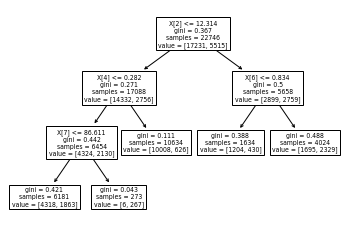

In [36]:
tree.plot_tree(dtc)
#訓練資料模型

In [37]:
import matplotlib.pyplot as plt

In [38]:
dtc.fit(X_test, y_test)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5, splitter='random')

In [39]:
from sklearn import tree

In [40]:
dtc.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

[Text(209.25, 190.26, 'X[7] <= 105.187\ngini = 0.362\nsamples = 9749\nvalue = [7431, 2318]'),
 Text(167.4, 135.9, 'X[4] <= 0.936\ngini = 0.347\nsamples = 9564\nvalue = [7428, 2136]'),
 Text(83.7, 81.53999999999999, 'X[8] <= 7.587\ngini = 0.489\nsamples = 3779\nvalue = [2166, 1613]'),
 Text(41.85, 27.180000000000007, 'gini = 0.482\nsamples = 3504\nvalue = [2088, 1416]'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.406\nsamples = 275\nvalue = [78, 197]'),
 Text(251.10000000000002, 81.53999999999999, 'X[7] <= 29.572\ngini = 0.164\nsamples = 5785\nvalue = [5262, 523]'),
 Text(209.25, 27.180000000000007, 'gini = 0.143\nsamples = 5569\nvalue = [5137, 432]'),
 Text(292.95, 27.180000000000007, 'gini = 0.488\nsamples = 216\nvalue = [125, 91]'),
 Text(251.10000000000002, 135.9, 'gini = 0.032\nsamples = 185\nvalue = [3, 182]')]

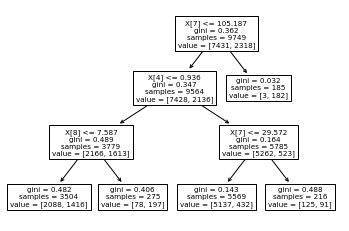

In [41]:
tree.plot_tree(dtc)
#測試資料模型